# BH weights accuracy on noisy datasets
---

## Contents
---

1. [Data Preparation](#1-Data-Preparation)
1. [Visualisation](#2-Visualisation)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
"""Check the folders hierarchy"""
from os.path import expanduser
user_home = expanduser("~")
path = user_home+'/Documents/Cosmostat/Codes/BlendHunter'

# 1 Data Preparation

### I. Bh results

In [2]:
# Input path
results_path=path+'/sigma_shift_results'
# List of sigma_noise values (for each noise realisation)
list_sigmas = ['0', '5', '5_1','5_2', '5_3', '5_4', '14', '14_1','14_2', '14_3','14_4', '18', '18_1', '18_2', '18_3','18_4', '26', '26_1','26_2', '26_3','26_4', '35', 
               '35_1','35_2','35_3', '35_4', '40', '40_1', '40_2', '40_3', '40_4']


# Load weights accuracy results
def load_weights_accuracy(input_path= None, sigma_value=None):
    acc = np.load(input_path+'/acc_weights{}.npy'.format(sigma_value), allow_pickle=True).item()
    return acc

"""Create comprehensive dictionary of results for all weights"""
def create_dict(n_path=None, sigmas=None):
    dict_ = dict()
    for i in sigmas:
        weights_acc = load_weights_accuracy(input_path=n_path, sigma_value=i)
        #Save dict in the dict
        dict_.update({'Weights'+str(i): weights_acc})
    return dict_

"""Create our dictionary"""
weights_results = create_dict(n_path=results_path, sigmas = list_sigmas)

"""Function to retrieve corresponding accuracy in dictionary"""
def get_accuracy_from_dict(weights = 'None'):
    return [weights_results[weights][key]['Accuracy'] for key in weights_results[weights]]

### II. Sep results

In [4]:
list_sigmas_sep = ['5', '51','52', '53', '54', '14', '141','142', '143','144', '18', '181', '182', '183','184', '26', '261','262', '263','264', '35', 
               '351','352','353', '354', '40', '401', '402', '403', '404']
path_flags = path+'/sep_results'

"""Load flags"""
def load_flags(input_path= None, sigma_value=None):
    data = np.load(input_path+'/flags_{}.npy'.format(sigma_value), allow_pickle=True)
    return data

"""Create comprehensive dictionary of results"""
def create_dict_flags(n_path=None, sigmas=None):
    dict_ = dict()
    for i in sigmas:
        flags = load_flags(input_path=n_path, sigma_value=i)
        acc = len(np.where(flags == 1)[0])/len(flags)
        #Save dict in the dict
        dict_.update({'Flags'+str(i): acc})
    return dict_

"""Create our dictionary"""
sep_results_dict = create_dict_flags(n_path=path_flags, sigmas = list_sigmas_sep)

"""Function to retrieve corresponding accuracy in dictionary"""
def get_accuracy_sep(flags = 'None'):
    return sep_results_dict[flags]['Accuracy']


### III. Calculation of mean and standard deviation of accuracy for each level of noise

In [ ]:
sigmas5 = ['5', '51','52', '53', '54'] 
sigmas14 = ['14', '141','142', '143','144'] 
sigmas18 = ['18', '181', '182', '183','184']
sigmas26 = ['26', '261','262', '263','264']
sigmas35 = ['35', '351','352','353', '354']
sigmas40= ['40', '401', '402', '403', '404']

In [4]:
def get_mean_accuracy(acc):
    return np.mean(acc)

In [5]:
def get_std_deviation(acc):
    return round(np.std(acc), 8)

### Means

In [5]:
"""Compute mean accuracies for sextractor"""

means_sep5 = get_mean_accuracy([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas5])
means_sep14 = get_mean_accuracy([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas14])
means_sep18 = get_mean_accuracy([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas18])
means_sep26 = get_mean_accuracy([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas26])
means_sep35 = get_mean_accuracy([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas35])
means_sep40 = get_mean_accuracy([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas40])

print('Accuracy mean for SExtractor: {}'.format(means_sep5))
print('Accuracy mean for SExtractor: {}'.format(means_sep14))
print('Accuracy mean for SExtractor: {}'.format(means_sep18))

Accuracy mean for SExtractor: 88.8345
Accuracy mean for SExtractor: 89.364
Accuracy mean for SExtractor: 88.276


In [6]:
"""List of mean accuracies for sep"""
list_means_sep = [means_sep5, means_sep14, means_sep18, means_sep26, means_sep35, means_sep40]

In [7]:
weights_sublist5 = ['Weights5', 'Weights5_1', 'Weights5_2', 'Weights5_3', 'Weights5_4' ]
weights_sublist14 = ['Weights14', 'Weights14_1', 'Weights14_2', 'Weights14_3', 'Weights14_4' ]
weights_sublist18 = ['Weights18', 'Weights18_1', 'Weights18_2', 'Weights18_3', 'Weights18_4' ]
weights_sublist26 = ['Weights26', 'Weights26_1', 'Weights26_2', 'Weights26_3', 'Weights26_4' ]
weights_sublist35 = ['Weights35', 'Weights35_1', 'Weights35_2', 'Weights35_3', 'Weights35_4' ]
weights_sublist40 = ['Weights40', 'Weights40_1', 'Weights40_2', 'Weights40_3', 'Weights40_4' ]

paths_sublist = ['Path3','Path7','Path10', 'Path12', 'Path16','Path18','Path20','Path22','Path24','Path26','Path28','Path30','Path32','Path35','Path37','Path40','Path42']


"""Mean accuracies for BH"""
means_bh5 = [get_mean_accuracy([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist5 ]) for path_ in paths_sublist]
means_bh14 = [get_mean_accuracy([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist14 ]) for path_ in paths_sublist]
means_bh18 = [get_mean_accuracy([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist18 ]) for path_ in paths_sublist]
means_bh26 = [get_mean_accuracy([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist26 ]) for path_ in paths_sublist]
means_bh35 = [get_mean_accuracy([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist35 ]) for path_ in paths_sublist]
means_bh40 = [get_mean_accuracy([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist40 ]) for path_ in paths_sublist]

In [8]:
"""List of mean accuracies for BH"""
list_means_bh = [means_bh5, means_bh14, means_bh18, means_bh26, means_bh35, means_bh40]

### Std deviations

In [9]:
"""Compute std deviation for sextractor"""
std_sep5 = get_std_deviation([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas5])
std_sep14 = get_std_deviation([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas14])
std_sep18 = get_std_deviation([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas18])
std_sep26 = get_std_deviation([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas26])
std_sep35 = get_std_deviation([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas35])
std_sep40 = get_std_deviation([sep_results_dict['Flags{}'.format(i)]*100 for i in sigmas40])
print('Standard deviation of accuracy for SExtractor: {}'.format(std_sep5))
print('Standard deviation of accuracy for SExtractor: {}'.format(std_sep14))

Standard deviation of accuracy for SExtractor: 0.02717536
Standard deviation of accuracy for SExtractor: 0.04211888


In [10]:
list_std_sep=[std_sep5, std_sep14, std_sep18, std_sep26, std_sep35, std_sep40]

In [11]:
"""Compute std deviation for BH"""
std_bh5 = [get_std_deviation([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist5 ]) for path_ in paths_sublist]
std_bh14 = [get_std_deviation([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist14 ]) for path_ in paths_sublist]
std_bh18 = [get_std_deviation([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist18 ]) for path_ in paths_sublist]
std_bh26 = [get_std_deviation([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist26 ]) for path_ in paths_sublist]
std_bh35 = [get_std_deviation([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist35 ]) for path_ in paths_sublist]
std_bh40 = [get_std_deviation([weights_results[i][path_]['Accuracy']*100 for i in weights_sublist40 ]) for path_ in paths_sublist]
print('Standard deviation of accuracy for BH: {}'.format(std_bh5))
print('Standard deviation of accuracy for BH: {}'.format(std_bh14))

Standard deviation of accuracy for BH: [0.16937385, 0.37454973, 0.29015082, 0.61145319, 1.14688164, 1.10158976, 1.1590783, 1.15765388, 0.98490482, 1.07149428, 0.97514742, 1.0591093, 1.18815508, 1.28840017, 1.28171272, 1.49980415, 1.67454098]
Standard deviation of accuracy for BH: [1.0958045, 0.29075333, 0.09440604, 0.23645824, 0.28398944, 0.2977415, 0.30108138, 0.44247881, 0.11895377, 0.23245967, 0.52395133, 0.3755496, 0.39406535, 0.36440019, 0.38902121, 0.37886343, 0.48279136]


# 2 Visualisation

## Weights trained on noisy datasets

### Comparison with SExtractor and BH (error bars)

In [13]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 5})

"""SExtractor was not tested on the additional datasets, 
   comparison is only made with results on the 6 original noise levels"""
sigma_values_sep = [5.0, 14.0, 18.0, 26.0, 35.0, 40.0]
sigma_values_bh = [3,7,10, 12, 16,18,20,22,24,26,28,30,32,35,37,40,42]

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


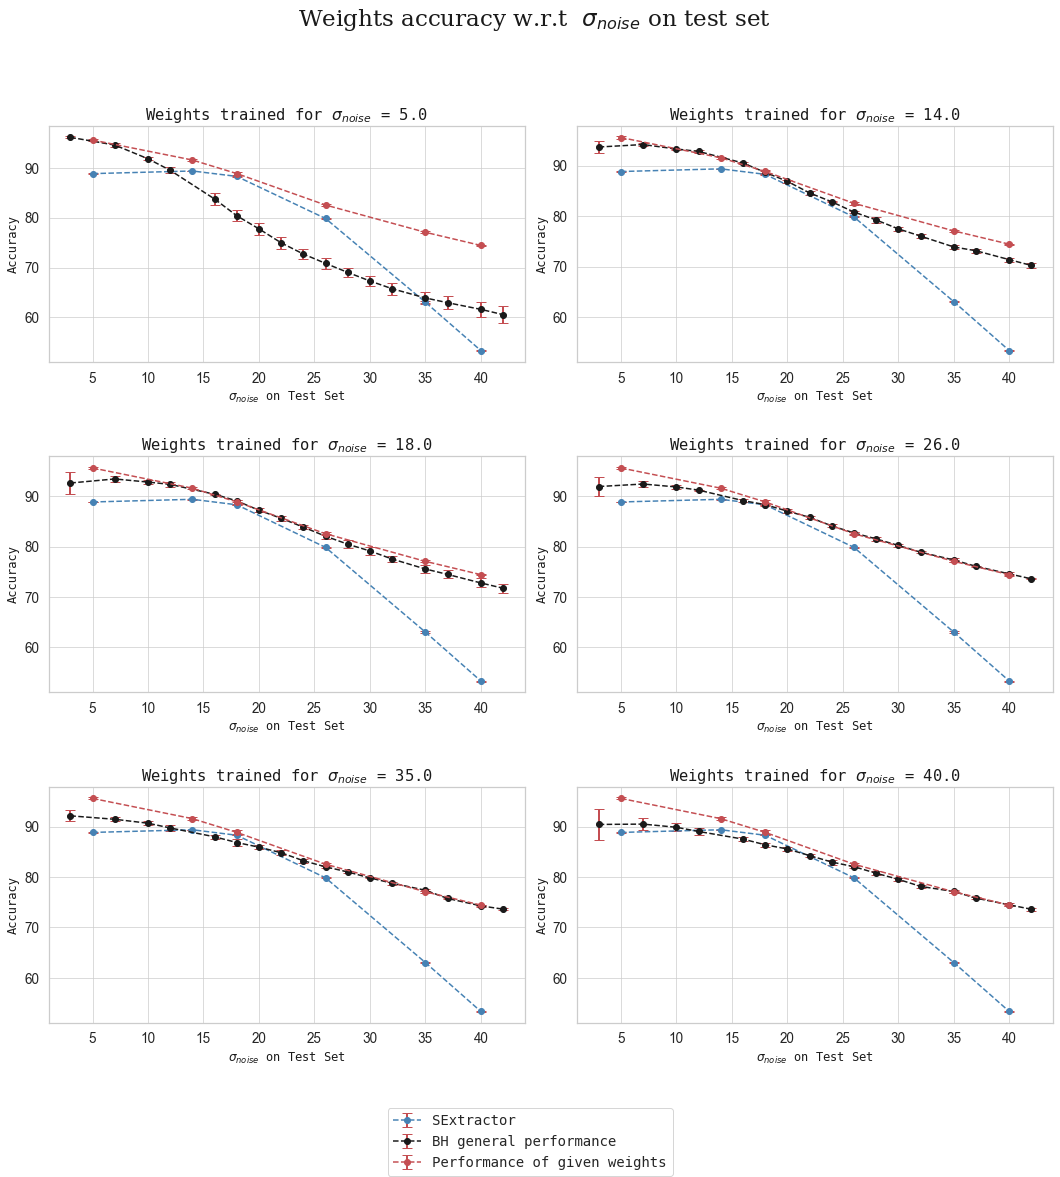

In [21]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace','color':  'k', 'weight': 'normal','size': 12}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(18,16.5), sharex=False)
fig.subplots_adjust(hspace = .2, wspace=.11)
#Title
fig.suptitle('Weights accuracy w.r.t  $\sigma_{noise}$ on test set', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('Weights trained for $\sigma_{noise}$ = 5.0', fontdict=font, fontsize=15.5)
ax[0,0].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[0,0].errorbar(sigma_values_bh, means_bh5, yerr=std_bh5, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[0,0].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[0,0].set_ylabel('Accuracy', fontdict = font)
ax[0,0].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[0,0].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)
#Second subplot 
ax[0,1].set_title('Weights trained for $\sigma_{noise}$ = 14.0', fontdict=font, fontsize=15.5)
ax[0,1].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[0,1].errorbar(sigma_values_bh, means_bh14, yerr=std_bh14, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[0,1].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[0,1].set_ylabel('Accuracy', fontdict = font)
ax[0,1].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[0,1].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)
#3rd subplot 
ax[1,0].set_title('Weights trained for $\sigma_{noise}$ = 18.0', fontdict=font, fontsize=15.5)
ax[1,0].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[1,0].errorbar(sigma_values_bh, means_bh18, yerr=std_bh18, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[1,0].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[1,0].set_ylabel('Accuracy', fontdict = font)
ax[1,0].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[1,0].tick_params(axis='both', which='both', labelsize=13.5, grid_alpha=0.7)
#4th subplot 
ax[1,1].set_title('Weights trained for $\sigma_{noise}$ = 26.0', fontdict=font, fontsize=15.5)
ax[1,1].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[1,1].errorbar(sigma_values_bh, means_bh26, yerr=std_bh26, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[1,1].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[1,1].set_ylabel('Accuracy', fontdict = font)
ax[1,1].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[1,1].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)
#5th subplot 
ax[2,0].set_title('Weights trained for $\sigma_{noise}$ = 35.0', fontdict=font, fontsize=15.5)
ax[2,0].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[2,0].errorbar(sigma_values_bh, means_bh35, yerr=std_bh35, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[2,0].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[2,0].set_ylabel('Accuracy', fontdict = font)
ax[2,0].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[2,0].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)
#6th subplot 
ax[2,1].set_title('Weights trained for $\sigma_{noise}$ = 40.0', fontdict=font, fontsize=15.5)
c=ax[2,1].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
d=ax[2,1].errorbar(sigma_values_bh, means_bh40, yerr=std_bh40, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
e=ax[2,1].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='weights5' )
ax[2,1].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[2,1].set_ylabel('Accuracy', fontdict = font)
ax[2,1].tick_params(axis='both',  which='both', labelsize=13.5, grid_alpha=0.7)

#Add legend
labels_legend=['SExtractor','BH general performance', 'Performance of given weights']
plt.subplots_adjust(hspace=0.4)
fig.legend([c,d,e], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=11, prop ={'family': 'monospace','weight': 'normal','size': 14})
plt.show()

### Same plot but only 4 noise levels

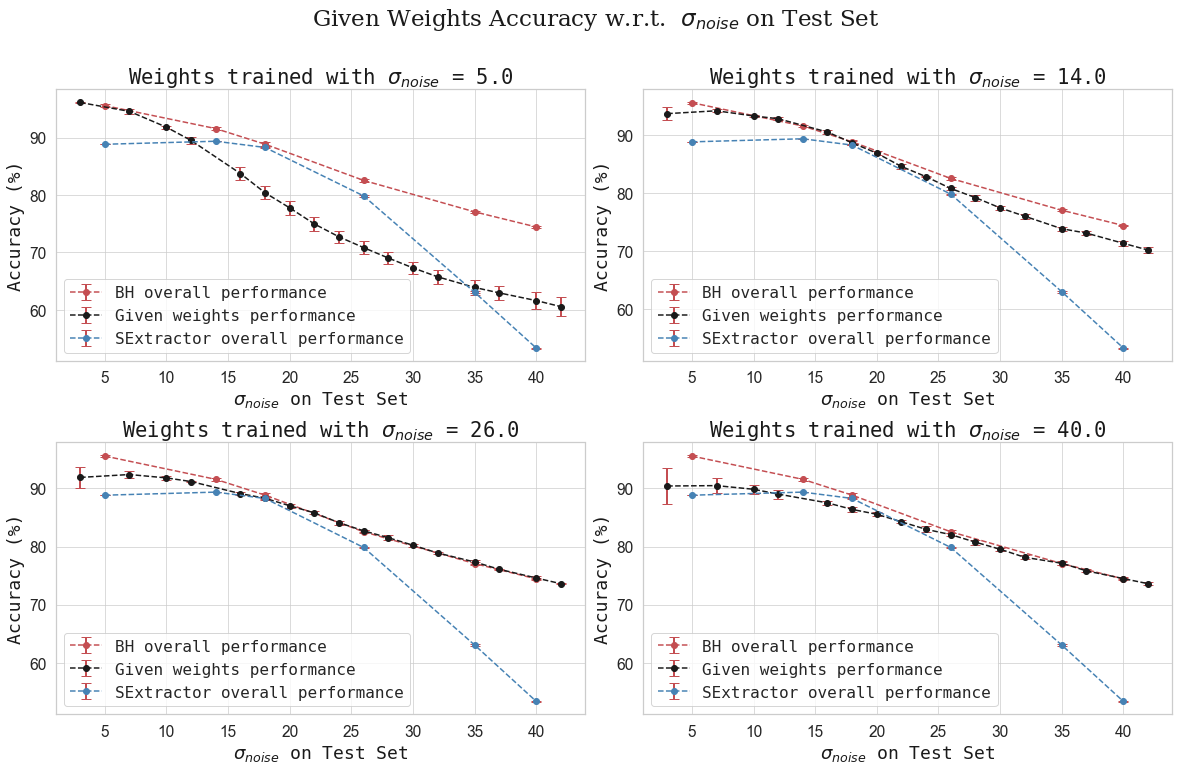

In [41]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace','color':  'k', 'weight': 'normal','size': 18}
#Start plot
fig, ax = plt.subplots(2,2,figsize=(20,11.5), sharex=False)
fig.subplots_adjust(hspace = .2, wspace=.11)
#Title
fig.suptitle('Given Weights Accuracy w.r.t.  $\sigma_{noise}$ on Test Set', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('Weights trained with $\sigma_{noise}$ = 5.0', fontdict=font, fontsize=20.5)
ax[0,0].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[0,0].errorbar(sigma_values_bh, means_bh5, yerr=std_bh5, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[0,0].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[0,0].tick_params(axis='both',  which='both', labelsize=15.5, grid_alpha=0.7)
ax[0,0].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})
#Second subplot 
ax[0,1].set_title('Weights trained with $\sigma_{noise}$ = 14.0', fontdict=font, fontsize=20.5)
ax[0,1].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[0,1].errorbar(sigma_values_bh, means_bh14, yerr=std_bh14, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[0,1].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[0,1].tick_params(axis='both',  which='both', labelsize=15.5, grid_alpha=0.7)
ax[0,1].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})
#3rd subplot 
ax[1,0].set_title('Weights trained with $\sigma_{noise}$ = 26.0', fontdict=font, fontsize=20.5)
ax[1,0].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[1,0].errorbar(sigma_values_bh, means_bh26, yerr=std_bh26, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[1,0].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[1,0].tick_params(axis='both',  which='both', labelsize=15.5, grid_alpha=0.7)
ax[1,0].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})
#4th subplot 
ax[1,1].set_title('Weights trained with $\sigma_{noise}$ = 40.0', fontdict=font, fontsize=20.5)
ax[1,1].errorbar(sigma_values_sep, bh_acc, yerr=std_bh, ecolor='r', color ='r', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='BH overall performance' )
ax[1,1].errorbar(sigma_values_bh, means_bh40, yerr=std_bh40, ecolor='r', color ='k', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='Given weights performance' )
ax[1,1].errorbar(sigma_values_sep, list_means_sep, yerr=list_std_sep, ecolor='r', color ='steelblue', ls='--', lw=1.5,fmt='--o',elinewidth=2, label='SExtractor overall performance' )
ax[1,1].set_xlabel('$\sigma_{noise}$ on Test Set', fontdict = font)
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].tick_params(axis='both',  which='both', labelsize=15.5, grid_alpha=0.7)
ax[1,1].legend(loc = 'lower left', prop={'family': 'monospace','size': 16})

#Add legend
#labels_legend=['SExtractor','BH general performance', 'Performance of given weights']
plt.subplots_adjust(hspace=0.3)
#fig.legend([c,d,e], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=11, prop ={'family': 'monospace','weight': 'normal','size': 14})
plt.show()

## III. Real data results

In [2]:
"""Weights results for each noise realisation at each noise level on Cosmos images"""
w5 = np.load(path+'/bh_real/w5_results.npy', allow_pickle=True)
w14 = np.load(path+'/bh_real/w14_results.npy', allow_pickle=True)
w18 = np.load(path+'/bh_real/w18_results.npy', allow_pickle=True)
w26 = np.load(path+'/bh_real/w26_results.npy', allow_pickle=True)
w35 = np.load(path+'/bh_real/w35_results.npy', allow_pickle=True)
w40 = np.load(path+'/bh_real/w40_results.npy', allow_pickle=True)

In [6]:
""" Compute mean accuracies and std deviations """
mean_w5 = get_mean_accuracy(w5*100)
mean_w14 = get_mean_accuracy(w14*100)
mean_w18 = get_mean_accuracy(w18*100)
mean_w26 = get_mean_accuracy(w26*100)
mean_w35 = get_mean_accuracy(w35*100)
mean_w40 = get_mean_accuracy(w40*100)

std_w5 = get_std_deviation(w5*100)
std_w14 = get_std_deviation(w14*100)
std_w18 = get_std_deviation(w18*100)
std_w26 = get_std_deviation(w26*100)
std_w35 = get_std_deviation(w35*100)
std_w40 = get_std_deviation(w40*100)

In [7]:
means_w = [mean_w5, mean_w14, mean_w18, mean_w26 ,mean_w35, mean_w40]
stds_w = [std_w5, std_w14, std_w18, std_w26, std_w35, std_w40]

### Plot

In [12]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 5})

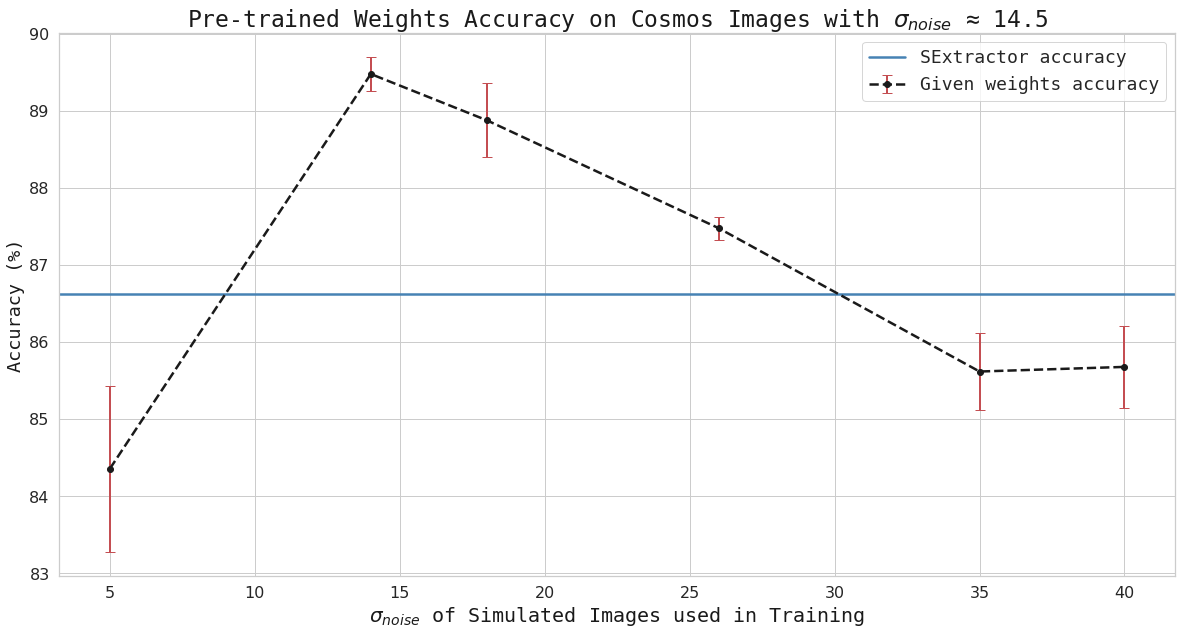

In [15]:
sigmas = [5.0, 14.0, 18.0, 26.0, 35.0, 40.0]

#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
font = {'family': 'monospace','color':  'k', 'weight': 'normal','size': 18}

fig = plt.figure(figsize=(20,10))
plt.title('Pre-trained Weights Accuracy on Cosmos Images with $\sigma_{noise}$ ≈ 14.5',fontdict=font, fontsize=23)
plt.errorbar(sigmas, means_w, yerr = stds_w, ecolor='r', elinewidth=2, color='k', marker='o', ls='--', lw=2.5, label='Given weights accuracy')
"""Sep single results on real images"""
plt.axhline(86.6175 , linestyle='-', color = 'steelblue', lw=2.5, label= 'SExtractor accuracy')
plt.xlabel('$\sigma_{noise}$ of Simulated Images used in Training', fontsize=20, fontdict=font)
plt.ylabel('Accuracy (%)', fontsize=18.5, fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(loc='upper right', prop = {'family': 'monospace','size': 18})
plt.show()